In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
font = {'family' : 'sans-serif',
        'size'   : 20}

plt.rc('font', **font)

from pathlib import Path
import os,sys
import h5py
import sys 

from circus.shared.parser import CircusParser
from circus.shared.files import load_data
import time

import nept
sys.path.append('../PreProcessing/')  
sys.path.append('../TrackingAnalyses/')  
sys.path.append('../Lib/')
from pre_process_neuralynx import *
from filters_ag import *
from TreeMazeFunctions import *

from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing, Polygon
from collections import Counter
from descartes import PolygonPatch

/Users/alexgonzalez/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# path to tracking data
datPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/VT1.nvt'
t,x,y,ha = load_nvt2(datPath)

In [3]:
step =0.02
# transform and smooth tracking signal @ original rate
t1= time.time()
xs,ys = ScaleRotateSmoothTrackDat(x,y)
t2=time.time()
print('Smoothing track data completed: {0:0.2f} s '.format(t2-t1))

# resampling the data
tp, xs   = ReSampleDat(t,xs,step)
_, ys   = ReSampleDat(t,ys,step)
tp = np.round(tp*1000)/1000 #round tp to ms resolution.
t3=time.time()
print('Resampling the Data to {0} seconds completed: {1:.2f} s '.format(step,t3-t2))

# get maze positions
PosZones = getMazeZones(xs,ys)
t4=time.time()
print('Converting Track x,y to TreeMaze Positions Completed: {0:.2f} s'.format(t4-t3))

# get position matrix
PosMat = PosZones2Mat(PosZones)
PosMat = pd.DataFrame(data=PosMat,columns=ZonesNames)
t4=time.time()
print('Creating Position Matrix Completed : {0:.2f} s'.format(t4-t3))

# get segment directions
SegDirMat = getSegmentDirs(PosZones,tp)
t5=time.time()
print('Creating Segment Direction Matrix Complete: {0:.2f} s'.format(t5-t4))
print('Processing of Position Data Complete : {0:.2f} s'.format(t5-t1))


Smoothing track data completed: 36.47 s 
Resampling the Data to 0.02 seconds completed: 0.05 s 
Converting Track x,y to TreeMaze Positions Completed: 30.76 s
Creating Position Matrix Completed : 30.78 s


KeyError: 871.52

In [16]:
# get segment directions
SegDirMat = getSegmentDirs(PosZones,tp)
t5=time.time()
print('Creating Segment Direction Matrix Complete: {0:.2f} s'.format(t5-t4))
print('Processing of Position Data Complete : {0:.2f} s'.format(t5-t1))


Creating Segment Direction Matrix Complete: 461.82 s
Processing of Position Data Complete : 529.12 s


In [6]:
def getPosSequence(PosZones,t):
    nPos = len(PosZones)
    out = []
    out.append((t[0],PosZones[0],0))
    for p in np.arange(nPos-1):
        p0 = PosZones[p]
        p1 = PosZones[p+1]
        if p0!=p1:
            out.append((t[p+1],p1,p+1))
    return out

In [17]:
SegDirMat

,SegAi,SegBi,SegCi,SegDi,SegEi,SegFi,SegGi,SegAo,SegBo,SegCo,SegDo,SegEo,SegFo,SegGo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
def getSegmentDirs(PosZones,t):
    PosSeq = getPosSequence(PosZones,tp)
    nPosSeqs = len(PosSeq)
    SegDirs = {}
    i=['Seg'+s+'i' for s in ['A','B','C','D','E','F','G']]
    o=['Seg'+s+'o' for s in ['A','B','C','D','E','F','G']]
    SegDirNames = i+o
    for io in SegDirNames:
        SegDirs[io] =[]

    for pos in np.arange(nPosSeqs-1):
        currentZone = PosSeq[pos][1]
        currentMarker = PosSeq[pos][2]
        nextZone = PosSeq[pos+1][1]
        deltaT = PosSeq[pos+1][2]  - currentMarker        
        if Zones[currentZone] == 'SegA':
            if Zones[nextZone]=='Home':
                SegDirs['SegAi'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegAo'].append([currentMarker,deltaT])                 
        elif Zones[currentZone] == 'SegB':
            if Zones[nextZone]=='Center':
                SegDirs['SegBi'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegBo'].append([currentMarker,deltaT]) 
        elif Zones[currentZone] == 'SegE':
            if Zones[nextZone]=='Center':
                SegDirs['SegEi'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegEo'].append([currentMarker,deltaT]) 
        elif Zones[currentZone] == 'SegC':
            if Zones[nextZone]=='G1':
                SegDirs['SegCo'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegCi'].append([currentMarker,deltaT]) 
        elif Zones[currentZone] == 'SegD':
            if Zones[nextZone]=='G2':
                SegDirs['SegDo'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegDi'].append([currentMarker,deltaT]) 
        elif Zones[currentZone] == 'SegF':
            if Zones[nextZone]=='G3':
                SegDirs['SegEo'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegEi'].append([currentMarker,deltaT])             
        elif Zones[currentZone] == 'SegG':
            if Zones[nextZone]=='G4':
                SegDirs['SegFo'].append([currentMarker,deltaT]) 
            else:
                SegDirs['SegFi'].append([currentMarker,deltaT]) 
    for io in SegDirNames:
        SegDirs[io] = np.array(SegDirs[io])
    
    nSegs = len(SegDirs)
    nSegDirNames = len(SegDirNames)
    SegDirMat = pd.DataFrame(np.zeros((len(tp),nSegDirNames),int),columns=SegDirNames)
    for segID in SegDirNames:    
        SegDirID = SegDirs[segID]
        nSegDirID = len(SegDirID)
        for i in np.arange(nSegDirID):
            mark = SegDirID[i][0]
            dur = SegDirID[i][1]
            SegDirMat[segID][mark:(mark+dur)]=1
    return SegDirMat
        

In [194]:
SegDirMat = getSegmentDirs(PosSeq,tp)

In [176]:
tp[SegDirMat['SegAi']==1]

array([ 900.58,  900.6 ,  900.62, ..., 3467.64, 3467.66, 3467.68])

In [167]:
nSegDirNames = len(SegDirNames)
SegDirMat = pd.DataFrame(np.zeros((len(tp),nSegDirNames),int),columns=SegDirNames)

['SegAi',
 'SegBi',
 'SegCi',
 'SegDi',
 'SegEi',
 'SegFi',
 'SegGi',
 'SegAo',
 'SegBo',
 'SegCo',
 'SegDo',
 'SegEo',
 'SegFo',
 'SegGo',
 's']

In [181]:
PosMat2 = pd.DataFrame(data=PosMat,columns=ZonesNames)

In [193]:
[PosMat2,SegDirMat]

[        Home  SegA  Center  SegB  I1  SegC  G1  SegD  G2  SegE  I2  SegF  G3  \
 0          1     0       0     0   0     0   0     0   0     0   0     0   0   
 1          0     1       0     0   0     0   0     0   0     0   0     0   0   
 2          0     1       0     0   0     0   0     0   0     0   0     0   0   
 3          0     1       0     0   0     0   0     0   0     0   0     0   0   
 4          0     1       0     0   0     0   0     0   0     0   0     0   0   
 5          0     1       0     0   0     0   0     0   0     0   0     0   0   
 6          0     1       0     0   0     0   0     0   0     0   0     0   0   
 7          0     1       0     0   0     0   0     0   0     0   0     0   0   
 8          0     1       0     0   0     0   0     0   0     0   0     0   0   
 9          0     0       1     0   0     0   0     0   0     0   0     0   0   
 10         0     0       1     0   0     0   0     0   0     0   0     0   0   
 11         0     0       1 

In [75]:
i=['Seg'+s+'i' for s in ['A','B','C','D','E','F','G']]
o=['Seg'+s+'o' for s in ['A','B','C','D','E','F','G']]
SegIONames = i+o
SegIONames

['SegAi',
 'SegBi',
 'SegCi',
 'SegDi',
 'SegEi',
 'SegFi',
 'SegGi',
 'SegAo',
 'SegBo',
 'SegCo',
 'SegDo',
 'SegEo',
 'SegFo',
 'SegGo']

## Old Development; record keeping.

In [3]:
# path to tracking data
datPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/VT1.nvt'
t,x,y,ha = load_nvt2(datPath)

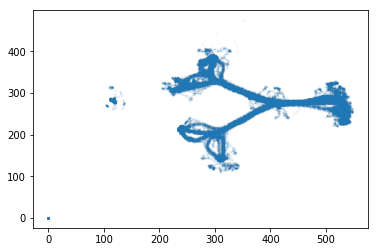

In [4]:
plt.scatter(x,y,1,alpha=0.05)

In [5]:
xs,ys = ScaleRotateSmoothTrackDat(x,y)

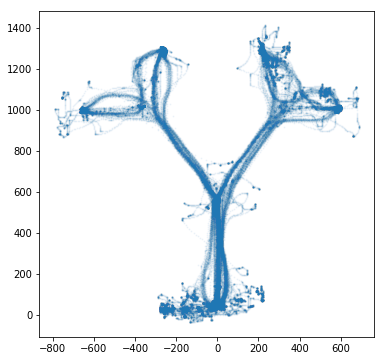

In [6]:
f,a=plt.subplots(1,1, figsize=(6,6))
a.scatter(xs,ys,1,alpha=0.05)

In [15]:
PosZones = getMazeZones(xs,ys)

In [16]:
def plotPoly(poly,ax,alpha=0.3,color='g'):    
    p1x,p1y = poly.exterior.xy
    ax.plot(p1x, p1y, color='k', alpha=alpha,
        linewidth=3,)
    ring_patch = PolygonPatch(poly, fc=color, ec='none', alpha=alpha)
    ax.add_patch(ring_patch)

In [ ]:
f,a1=plt.subplots(1,1, figsize=(10,10))
for zo in MazeZonesGeom.keys():
    plotPoly(MazeZonesGeom[zo],a1)
    
a1.plot(xs,ys,alpha=0.1,color='k',linewidth=0.1)
a1.scatter(xs,ys,20, alpha=0.005,color='k')
a1.grid() 


In [18]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    return M

In [1]:
def getPosSequence(t,PosZones):
    nPos = len(PosZones)
    out = []
    out.append((t[0],PosZones[0]))
    for p in np.arange(1,nPos-1):
        p0 = PosZones[p]
        p1 = PosZones[p+1]
        if p0!=p1:
            out.append((t[p1],p1))
    return out

In [19]:
M = pd.DataFrame(transition_matrix(PosZones),columns=Zones.values(),index=Zones.values())
M

,Home,SegA,Center,SegB,I1,SegC,G1,SegD,G2,SegE,I2,SegF,G3,SegG,G4
Home,46760,158,0,0,0,0,0,0,0,0,0,0,0,0,0
SegA,158,15548,151,0,0,0,0,0,0,0,0,0,0,0,0
Center,0,151,22473,74,0,0,0,0,0,75,0,0,0,0,0
SegB,0,0,80,6517,74,1,0,0,0,3,0,0,0,0,0
I1,0,0,0,75,1808,37,0,58,0,0,0,0,0,0,0
SegC,0,0,0,0,66,5756,56,5,0,0,0,0,0,0,0
G1,0,0,0,0,0,56,7672,0,0,0,0,0,0,0,0
SegD,0,0,0,0,30,33,0,5526,66,0,0,0,0,0,0
G2,0,0,0,0,0,0,0,66,11372,0,0,0,0,0,0
SegE,0,0,69,9,0,0,0,0,0,6018,73,1,0,0,0


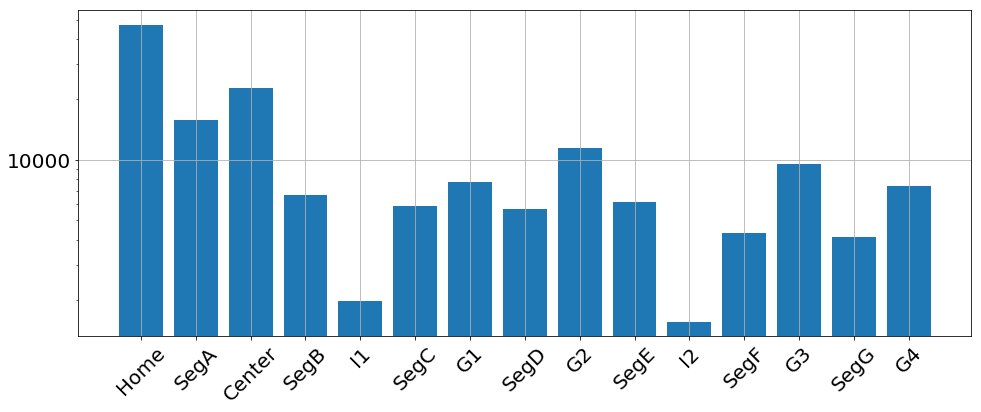

In [20]:
f,a1=plt.subplots(1,1, figsize=(16,6))
a=Counter(PosZones)
counts,_ = np.histogram(PosZones,np.arange(nZones+1))
zoneIDs = np.arange(nZones)
a1.bar(np.arange(nZones), counts)
a1.set_yscale('log')
#a1.set_yticks([100,200, 500, 1000])
a1.set_xticks(np.arange(nZones))
a1.set_xticklabels(Zones.values())
a1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
a1.grid()

for tick in a1.get_xticklabels():
    tick.set_rotation(45)


In [16]:
counts, ids=np.histogram(PosZones,np.arange(nZones+1))
print(len(counts),counts,ids)

15 [46919 15857 22773  6675  1978  5883  7728  5655 11438  6170  1561  4293
  9531  4125  7400] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


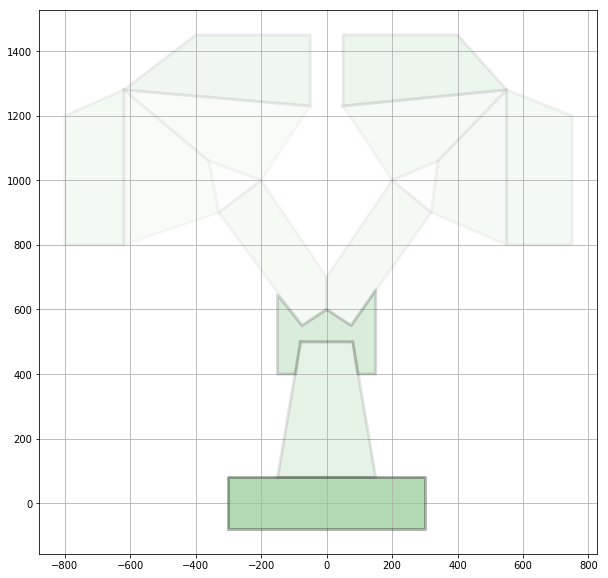

In [18]:
prob = counts/np.sum(counts)
cnt = 0
f,a1=plt.subplots(1,1, figsize=(10,10))
a1.grid() 

for zo in Zones.values():
    plotPoly(MazeZonesGeom[zo],a1,alpha=prob[cnt])
    cnt+=1

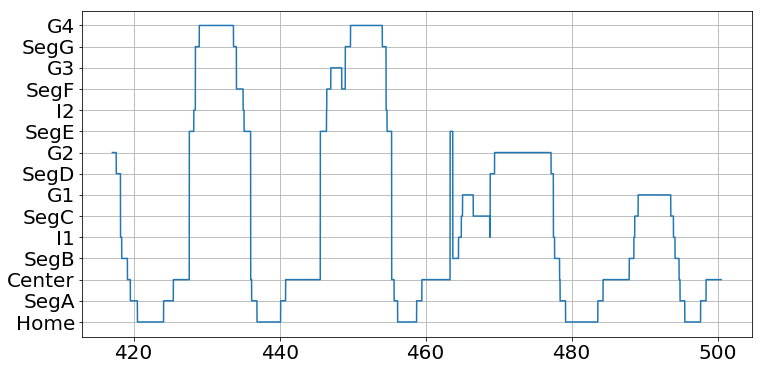

In [21]:
f,a1=plt.subplots(1,1, figsize=(12,6))
window = np.arange(5000)+5000*5
a1.plot(t[window]-t[0],PosZones[window])
a1.set_yticks(np.arange(nZones))
a1.set_yticklabels(Zones.values())
a1.grid()

In [22]:
M = PosZones2Mat(PosZones)  

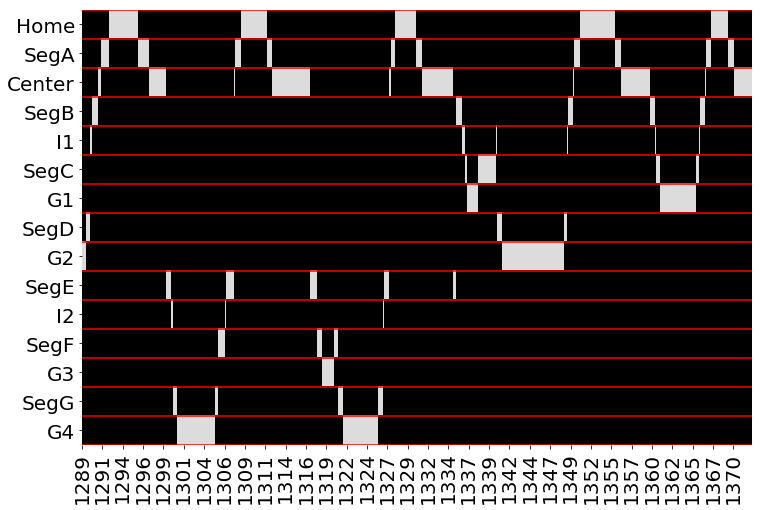

In [24]:
window = np.arange(5000)+5000*5
f,a1=plt.subplots(1,1, figsize=(12,8))

sns.heatmap(M[window,:].T,ax=a1,yticklabels=ZonesNames,cbar=0,cmap='Greys_r',vmax=1.3)
a1.hlines(np.arange(21), *a1.get_xlim(),color='red')
#a1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x=a1.get_xticks().astype(int)
_=a1.set_xticklabels(np.round(t[window[x]]).astype(int))
